## Phase 4 (Modeling): Multilayer Perceptron

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 9](https://data-science.training/kapitel-9/)
* Datum: 23.03.2023

Versionen 4 und 5

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 4, 5
version  = 5
# Modell-Abkürzung festlegen: mlp = Multilayer Perceptron
shortcut = 'mlp'
# Preprocessing für Version 5 festlegen: 1 = MinMaxScaler, 2 = StandardScaler
prepro = 2

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Input-Werte (X) skalieren: Z-Score Normierung (Standard-Normalverteilung)
#  (KNIME: "Normalizer (PMML)")
#
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
#
# 1.17.8. Tips on Practical Use
# Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data.
# For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have
# mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results.
# You can use StandardScaler for standardization.
#
if version == 5:
    if prepro == 1:
        scaler = MinMaxScaler()
    else:     
        scaler = StandardScaler()
    X = scaler.fit_transform(X)

In [9]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [10]:
# Multilayer Perceptron auswählen
#  (KNIME: "RProp MLP Learner")
model = MLPClassifier(random_state=0)
print(model.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [11]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 503
* TP (True  Positives) : 230
* FN (False Negatives) : 112
* FP (False Positives) : 46

Gütemaße

* Genauigkeit  (Accuracy)    :   82,26 %
* Spezifität   (Specificity) :   91,61 %
* Sensitivität (Sensitivity) :   67,24 %
* Präzision    (Precision)   :   83,38 %
* Recall       (Recall)      :   67,24 %
* F-Maß        (F Score)     :   74,21 %
* AURC         (AURC)        :   86,54 %
* LogLoss      (LogLoss)     :    0,414

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,60 %


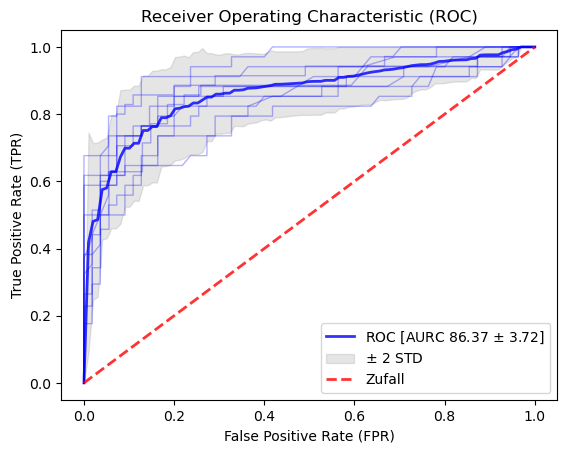

In [12]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [13]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

MLPClassifier(random_state=0)

In [14]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version)
if version == 5:
    filename += '_pp_' + str(prepro)
pk.dump(model, open(filename, 'wb'))

In [15]:
# Scaler speichern
#  (KNIME: "PMML Writer")
if version == 5:
    filename += '_scaler'
    pk.dump(scaler, open(filename, 'wb'))

## Ergebnisse

#### Version 4 (Boolean bzw. Int)

Confusion Matrix

* TN (True  Negatives) : 496
* TP (True  Positives) : 239
* FN (False Negatives) : 103
* FP (False Positives) : 53

Gütemaße

* Genauigkeit  (Accuracy)    :   82,49 %
* Spezifität   (Specificity) :   90,35 %
* Sensitivität (Sensitivity) :   69,87 %
* Präzision    (Precision)   :   82,13 %
* Recall       (Recall)      :   69,87 %
* F-Maß        (F Score)     :   75,31 %
* AURC         (AURC)        :   86,59 %
* LogLoss      (LogLoss)     :    0,410

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,63 %

#### Version 5 (Float) MinMaxScaler

Confusion Matrix

* TN (True  Negatives) : 498
* TP (True  Positives) : 231
* FN (False Negatives) : 111
* FP (False Positives) : 51

Gütemaße

* Genauigkeit  (Accuracy)    :   81,82 %
* Spezifität   (Specificity) :   90,71 %
* Sensitivität (Sensitivity) :   67,55 %
* Präzision    (Precision)   :   82,14 %
* Recall       (Recall)      :   67,55 %
* F-Maß        (F Score)     :   73,96 %
* AURC         (AURC)        :   86,57 %
* LogLoss      (LogLoss)     :    0,421

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,12 %

#### Version 5 (Float) StandardScaler

Confusion Matrix

* TN (True  Negatives) : 503
* TP (True  Positives) : 230
* FN (False Negatives) : 112
* FP (False Positives) : 46

Gütemaße

* Genauigkeit  (Accuracy)    :   82,26 %
* Spezifität   (Specificity) :   91,61 %
* Sensitivität (Sensitivity) :   67,24 %
* Präzision    (Precision)   :   83,38 %
* Recall       (Recall)      :   67,24 %
* F-Maß        (F Score)     :   74,21 %
* AURC         (AURC)        :   86,54 %
* LogLoss      (LogLoss)     :    0,414

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,60 %
